In [1]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
from DataGenerationRadar1D import GenerateData,rangeAccuracy,velocityAccuracy
from KalmanFilter import KalmanFilter

from ui import *

[[0.005 0.01  0.01 ]
 [0.01  0.02  0.02 ]
 [0.01  0.02  0.02 ]]


In [2]:
opt = {
        "initialDistance": 8,
        "stopTime": 1,
        "movementRange": 1,
        "frequency": 2,
        "SporadicError": 5,
        "velocity": 3
    }

timeAxis, distValues, velValues, truthDistValues, truthVelValues = GenerateData(type="Static", options=opt)

In [3]:
R = np.diag([rangeAccuracy**2, velocityAccuracy**2])/3
Q = np.diag([0,0,0])
s0 = np.array([distValues[0], velValues[0], 0])
transition_model = np.array([[1, 0.01, 0.01/2],
                             [0, 1, 0.01],
                             [0, 0, 0.01]])
H =  np.array([[1., 0., 0.],
               [0., 1., 0.]])

In [4]:
kalmanFilter1D = KalmanFilter(s0, transition_model, H, Q, R)

In [5]:
Predictions = [s0]
for i in range(1,np.size(timeAxis)):
    s = np.array([distValues[i], velValues[i]])
    pred = kalmanFilter1D.step(s)
    Predictions.append(pred)

In [6]:
def update(initialDistance, initialVelocity, stopTime, movementRange, frequency, SporadicError, velocity,
           acceleration,minRange_value, maxRange_value, maxVelocity_value, rangeAccuracy_value,
           velocityAccuracy_value,measurementRate_value,q0,q1,q2,r0,r1,type_value='Static',):
    opt = {
        "initialDistance": initialDistance,
        "initialVelocity": initialVelocity,
        "stopTime": stopTime,
        "movementRange": movementRange,
        "frequency": frequency,
        "SporadicError": SporadicError,
        "velocity": velocity,
        "acceleration": acceleration

    }
    setup_ui(type_value)
    update_sensor_settings(minRange_value, maxRange_value, maxVelocity_value, rangeAccuracy_value,
                           velocityAccuracy_value, measurementRate_value)
    timeAxis, distValues, velValues, truthDistValues, truthVelValues = GenerateData(type=type_value, options=opt)
    
    s0 = np.array([distValues[0], velValues[0], 0])
    R = np.diag([r0, r1])
    Q = np.diag([q0,q1,q2])
    kalmanFilter1D = KalmanFilter(s0, transition_model, H, Q, R)
    Predictions = [s0]
    for i in range(1, np.size(timeAxis)):
        s = np.array([distValues[i], velValues[i]])
        pred = kalmanFilter1D.step(s)
        Predictions.append(pred)
    
    #ax_dist.set_xticks(np.arange(0, stopTime, 0.1))
    data_dist.set_xdata(timeAxis)
    true_dist.set_xdata(timeAxis)
    kalman_1D_dist.set_xdata(timeAxis)
    data_vel.set_xdata(timeAxis)
    true_vel.set_xdata(timeAxis)
    kalman_1D_vel.set_xdata(timeAxis)
    
    Predictions = np.reshape(Predictions, (3, np.size(timeAxis)))
    true_dist.set_ydata(truthDistValues)
    true_vel.set_ydata(truthVelValues)
    kalman_1D_dist.set_ydata(Predictions[0])
    kalman_1D_vel.set_ydata(Predictions[1])
    data_dist.set_ydata(distValues)
    data_vel.set_ydata(velValues)
    fig.canvas.draw_idle()

<IPython.core.display.Javascript object>


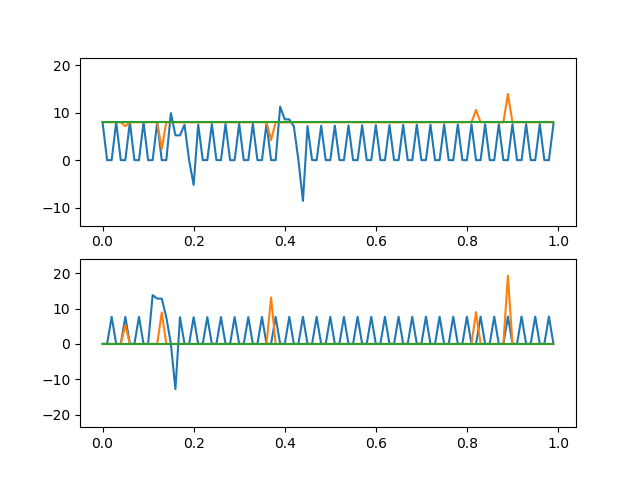

Output()

In [7]:
fig = plt.figure()
ax_dist = fig.add_subplot(211)
ax_vel = fig.add_subplot(212)
Predictions = np.reshape(Predictions, (3, np.size(timeAxis)))
kalman_1D_dist, = ax_dist.plot(timeAxis, Predictions[0])
kalman_1D_vel, = ax_vel.plot(timeAxis, Predictions[1])
data_dist, =  ax_dist.plot(timeAxis, distValues)
data_vel, = ax_vel.plot(timeAxis, velValues)
true_dist, = ax_dist.plot(timeAxis, truthDistValues)
true_vel, = ax_vel.plot(timeAxis, truthVelValues)

# update_dict = {**option_dict}

out = widgets.interactive_output(update,update_dict)
ui = widgets.HBox([option_ui,sensor_ui,kalman_ui])
display(out,ui)